In [ ]:
file_path = "/content/dataset_v1.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv(file_path)

In [ ]:
data_df.head().T

,0,1,2,3,4
study_id,NCT01868646,NCT02879383,NCT01020123,NCT01972724,NCT01969084
phase,PHASE4,NaN,PHASE2,PHASE4,PHASE4
sponsor_type,INDUSTRY,INDUSTRY,INDUSTRY,INDUSTRY,OTHER
no_of_locations,17.0,11.0,76.0,9.0,1.0
no_of_conditions,1,2,1,1,1
enrollment,190.0,109.0,530.0,114.0,45.0
allocation,RANDOMIZED,RANDOMIZED,RANDOMIZED,RANDOMIZED,RANDOMIZED
intervention_model,PARALLEL,CROSSOVER,PARALLEL,SINGLE_GROUP,PARALLEL
masking,QUADRUPLE,DOUBLE,DOUBLE,NONE,QUADRUPLE
no_of_arms,2.0,2.0,7.0,3.0,2.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 5896 non-null   object 
 1   phase                                    3620 non-null   object 
 2   sponsor_type                             5896 non-null   object 
 3   no_of_locations                          5392 non-null   float64
 4   no_of_conditions                         5896 non-null   int64  
 5   enrollment                               5848 non-null   float64
 6   allocation                               5319 non-null   object 
 7   intervention_model                       5863 non-null   object 
 8   masking                                  5848 non-null   object 
 9   no_of_arms                               5416 non-null   float64
 10  no_of_drug_interventions                 5896 no

In [ ]:
data_df['has_result'].value_counts()

,count
has_result,
False,4296
True,1600


In [ ]:
# DataFrame with 'has_result' as True
df_true = data_df[data_df['has_result'] == True]

# DataFrame with 'has_result' as False
df_false = data_df[data_df['has_result'] == False]

# Displaying the shape of the two DataFrames
print("DataFrame with has_result = True:", df_true.shape)
print("DataFrame with has_result = False:", df_false.shape)


DataFrame with has_result = True: (1600, 31)
DataFrame with has_result = False: (4296, 31)


#### Handling Class Imbalance

In our dataset, we have an imbalance between the two classes: `True` and `False`. The `False` class has significantly more rows than the `True` class, which could affect the performance of certain models. To address this issue, we’ll follow these steps to balance the classes:

1. **Cleaning the `False` Class**: First, we’ll drop any rows in the `False` class that contain missing values (NaNs). This will leave us with a cleaner dataset of `False` rows, but we’ll have fewer than the `True` class.
   
2. **Filling the Gap**: Since we need 1600 rows for the `False` class to balance it with the `True` class, we’ll randomly sample additional rows from the original `False` dataset, excluding the rows that we already cleaned. This way, we avoid duplicating rows that were already added to the cleaned dataset.

3. **Combining the Data**: After sampling enough rows to reach 1600, we’ll combine the cleaned `False` class and the `True` class into one final balanced dataset. This will give us a dataset with equal representation from both classes, ready for further processing or model training.


In [ ]:
df_false.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4296 entries, 1600 to 5895
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 4296 non-null   object 
 1   phase                                    2325 non-null   object 
 2   sponsor_type                             4296 non-null   object 
 3   no_of_locations                          3966 non-null   float64
 4   no_of_conditions                         4296 non-null   int64  
 5   enrollment                               4248 non-null   float64
 6   allocation                               3849 non-null   object 
 7   intervention_model                       4265 non-null   object 
 8   masking                                  4253 non-null   object 
 9   no_of_arms                               3824 non-null   float64
 10  no_of_drug_interventions                 4296 non-

In [ ]:
# Calculate the number of missing values
missing_values = df_false.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df_false)) * 100

# Print the percentage of missing values
print(missing_percentage)


study_id                                    0.000000
phase                                      45.879888
sponsor_type                                0.000000
no_of_locations                             7.681564
no_of_conditions                            0.000000
enrollment                                  1.117318
allocation                                 10.405028
intervention_model                          0.721601
masking                                     1.000931
no_of_arms                                 10.986965
no_of_drug_interventions                    0.000000
no_of_behavioral_interventions              0.000000
no_of_procedural_interventions              0.000000
no_of_biological_interventions              0.000000
no_of_device_interventions                  0.000000
no_of_dietary_interventions                 0.000000
no_of_other_interventions                   0.000000
adverseEventDataAvailable                   0.000000
no_of_combination_product_interventions     0.

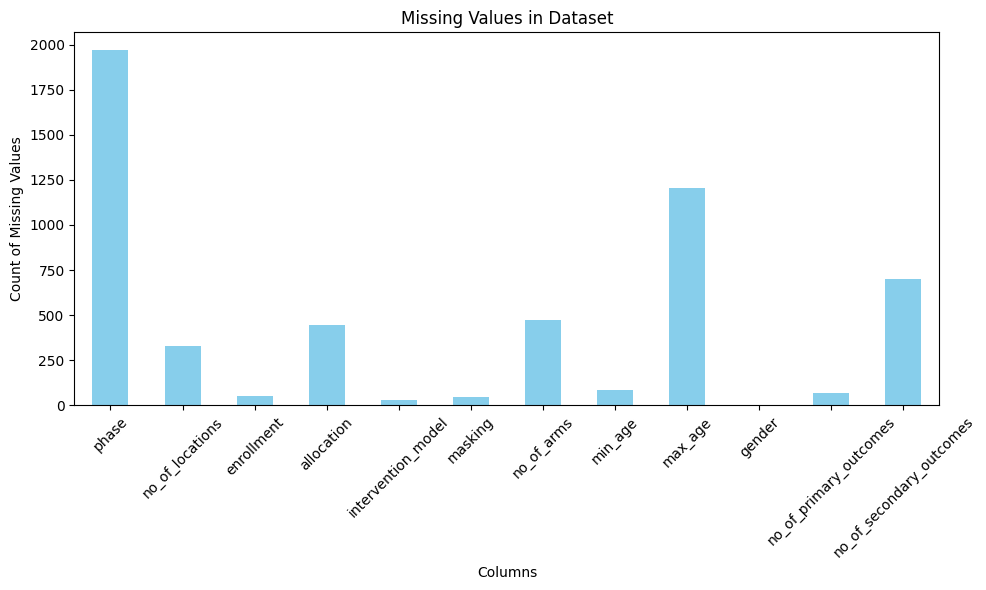

In [ ]:
# Count missing values
missing_values = df_false.isnull().sum()

# Plotting missing values
plt.figure(figsize=(10,6))
missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Creating a new DataFrame with rows that have no NaN values
df_false_clean = df_false.dropna()
df_false_clean.shape

(1182, 31)

In [ ]:
clean_ids = df_false_clean['study_id']
len(clean_ids)

1182

In [ ]:
df_false_remaining = df_false[~df_false['study_id'].isin(clean_ids)]
rows_needed = 1600 - len(df_false_clean)
df_additional = df_false_remaining.sample(n=rows_needed, random_state=42)
final_df_false = pd.concat([df_false_clean, df_additional], ignore_index=True)
final_df_false.shape

(1600, 31)

In [ ]:
df_true.shape, final_df_false.shape

((1600, 31), (1600, 31))

In [ ]:
# Concatenate df_true and final_df (the modified df_false)
df_combined = pd.concat([df_true, final_df_false], ignore_index=True)

# Verify the shape of the resulting DataFrame
print(f"df_true.shape: {df_true.shape}")
print(f"final_df.shape: {final_df_false.shape}")
print(f"Combined DataFrame shape: {df_combined.shape}")


df_true.shape: (1600, 31)
final_df.shape: (1600, 31)
Combined DataFrame shape: (3200, 31)


### Data Cleaning

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 3200 non-null   object 
 1   phase                                    2615 non-null   object 
 2   sponsor_type                             3200 non-null   object 
 3   no_of_locations                          2985 non-null   float64
 4   no_of_conditions                         3200 non-null   int64  
 5   enrollment                               3195 non-null   float64
 6   allocation                               3009 non-null   object 
 7   intervention_model                       3190 non-null   object 
 8   masking                                  3187 non-null   object 
 9   no_of_arms                               3125 non-null   float64
 10  no_of_drug_interventions                 3200 no

In [ ]:
df_combined['phase'].value_counts()

,count
phase,
PHASE3,768
PHASE1,669
PHASE4,600
PHASE2,555
EARLY_PHASE1,23


**Note:**  
We filled the missing values in the `phase` column with `'MISSING'`. The reason for this is that we don't want to guess the phase since it might lead to inaccurate insights. Instead, marking them as `'MISSING'` makes it clear that the data was unavailable. This way, we can easily identify and filter these rows later if needed, without losing the context of missing information.

In [ ]:
# Replace NaN with 'MISSING'
df_combined['phase'] = df_combined['phase'].fillna('MISSING')

In [ ]:
df_combined['phase'].value_counts()

,count
phase,
PHASE3,768
PHASE1,669
PHASE4,600
MISSING,585
PHASE2,555
EARLY_PHASE1,23


<ipython-input-20-98fd44b4dc28>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="viridis")


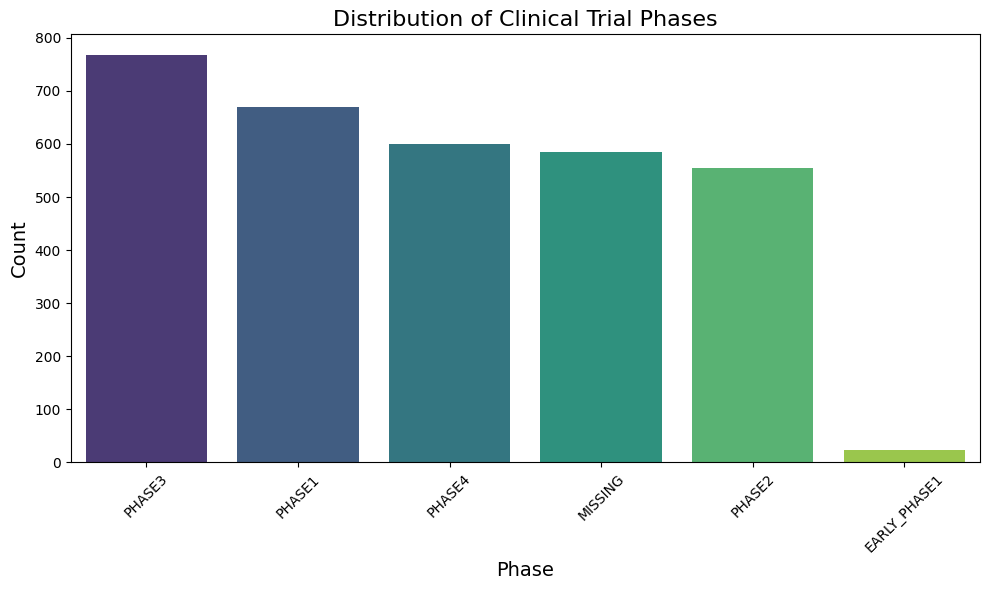

In [ ]:
# Count the occurrences of each phase
phase_counts = df_combined['phase'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="viridis")
plt.title("Distribution of Clinical Trial Phases", fontsize=16)
plt.xlabel("Phase", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# Calculate the count of 'MISSING' values
missing_count = df_combined['phase'].value_counts().get('MISSING', 0)

# Calculate the percentage of 'MISSING'
total_count = len(df_combined['phase'])
missing_percentage = (missing_count / total_count) * 100

print(f"Percentage of 'MISSING' values in the phase column: {missing_percentage:.2f}%")

Percentage of 'MISSING' values in the phase column: 18.28%


**Note:**  
We applied One-Hot Encoding to the `phase` column because it's a categorical variable without any inherent order (e.g., `PHASE1`, `PHASE2`, etc.). One-Hot Encoding creates separate binary columns for each category, ensuring the model treats these phases as distinct and independent entities. This is especially useful for machine learning models that don't naturally handle categorical data, like linear regression or decision trees. It avoids introducing unintended ordinal relationships, which might happen with techniques like Label Encoding.

In [ ]:
# Perform One-Hot Encoding
phase_one_hot = pd.get_dummies(df_combined['phase'], prefix='phase')

# Concatenate the new One-Hot Encoded columns and drop the old 'phase' column
df_combined = pd.concat([df_combined, phase_one_hot], axis=1)
df_combined.drop(columns=['phase'], inplace=True)

In [ ]:
# Convert the One-Hot Encoded phase columns to 0 and 1
phase_columns = [col for col in df_combined.columns if col.startswith('phase_')]
df_combined[phase_columns] = df_combined[phase_columns].astype(int)

In [ ]:
df_combined.head().T

,0,1,2,3,4
study_id,NCT01868646,NCT02879383,NCT01020123,NCT01972724,NCT01969084
sponsor_type,INDUSTRY,INDUSTRY,INDUSTRY,INDUSTRY,OTHER
no_of_locations,17.0,11.0,76.0,9.0,1.0
no_of_conditions,1,2,1,1,1
enrollment,190.0,109.0,530.0,114.0,45.0
allocation,RANDOMIZED,RANDOMIZED,RANDOMIZED,RANDOMIZED,RANDOMIZED
intervention_model,PARALLEL,CROSSOVER,PARALLEL,SINGLE_GROUP,PARALLEL
masking,QUADRUPLE,DOUBLE,DOUBLE,NONE,QUADRUPLE
no_of_arms,2.0,2.0,7.0,3.0,2.0
no_of_drug_interventions,2,0,3,3,2


In [ ]:
df_combined['sponsor_type'].value_counts()

,count
sponsor_type,
INDUSTRY,1972
OTHER,1138
OTHER_GOV,34
FED,26
NIH,21
INDIV,5
NETWORK,4


In [ ]:
df_combined['sponsor_type'].isna().sum()

0

In [ ]:
# Perform One-Hot Encoding on the sponsor_type column
sponsor_one_hot = pd.get_dummies(df_combined['sponsor_type'], prefix='sponsor')

# Add the new columns and drop the original sponsor_type column
df_combined = pd.concat([df_combined, sponsor_one_hot], axis=1)
df_combined.drop(columns=['sponsor_type'], inplace=True)

# Ensure the values are 0 and 1 (they already are by default with One-Hot Encoding)
df_combined[sponsor_one_hot.columns] = df_combined[sponsor_one_hot.columns].astype(int)

In [ ]:
df_combined.head().T

,0,1,2,3,4
study_id,NCT01868646,NCT02879383,NCT01020123,NCT01972724,NCT01969084
no_of_locations,17.0,11.0,76.0,9.0,1.0
no_of_conditions,1,2,1,1,1
enrollment,190.0,109.0,530.0,114.0,45.0
allocation,RANDOMIZED,RANDOMIZED,RANDOMIZED,RANDOMIZED,RANDOMIZED
intervention_model,PARALLEL,CROSSOVER,PARALLEL,SINGLE_GROUP,PARALLEL
masking,QUADRUPLE,DOUBLE,DOUBLE,NONE,QUADRUPLE
no_of_arms,2.0,2.0,7.0,3.0,2.0
no_of_drug_interventions,2,0,3,3,2
no_of_behavioral_interventions,0,0,0,0,0


**Note:**  
We replaced the missing values in the `no_of_locations` column with the **median** value, as only 6% of the data was missing. After filling the missing values, we converted the entire column to **integers** for consistency and easier analysis.

In [ ]:
df_combined['no_of_locations']

,no_of_locations
0,17.0
1,11.0
2,76.0
3,9.0
4,1.0
...,...
3195,1.0
3196,NaN
3197,1.0
3198,4.0


In [ ]:
# Calculate the count of missing (NaN) values
missing_count = df_combined['no_of_locations'].isna().sum()

# Calculate the total number of entries
total_count = len(df_combined)

# Calculate the percentage of missing values
missing_percentage = (missing_count / total_count) * 100

print(f"Percentage of missing values in 'no_of_locations': {missing_percentage:.2f}%")

Percentage of missing values in 'no_of_locations': 6.72%


In [ ]:
# Calculate the median of 'no_of_locations' (ignoring NaN values)
median_value = df_combined['no_of_locations'].median()

# Replace NaN values with the median
df_combined['no_of_locations'] = df_combined['no_of_locations'].fillna(median_value)

# Convert all values in 'no_of_locations' to integers
df_combined['no_of_locations'] = df_combined['no_of_locations'].astype(int)

In [ ]:
df_combined['no_of_locations'].isna().sum()

0

In [ ]:
df_combined['enrollment'].isna().sum()

5

In [ ]:
# Calculate the median of 'enrollment' (ignoring NaN values)
median_value = df_combined['enrollment'].median()

# Replace NaN values with the median
df_combined['enrollment'] = df_combined['enrollment'].fillna(median_value)

# Convert all values in 'enrollment' to integers
df_combined['enrollment'] = df_combined['enrollment'].astype(int)

In [ ]:
df_combined['enrollment']

,enrollment
0,190
1,109
2,530
3,114
4,45
...,...
3195,28
3196,13
3197,35
3198,132


In [ ]:
df_combined['allocation'].value_counts()

,count
allocation,
RANDOMIZED,2812
NON_RANDOMIZED,197


In [ ]:
df_combined['allocation'].isna().sum()

191

In [ ]:
# Fill missing values with the most frequent category ('RANDOMIZED')
most_frequent_allocation = df_combined['allocation'].mode()[0]
df_combined['allocation'] = df_combined['allocation'].fillna(most_frequent_allocation)

**Note:**  
To convert the categorical `allocation` column to numerical, we used label encoding. This assigns unique numerical values to each category.
**Converted `allocation` to numbers:**

- Used label encoding to map `RANDOMIZED` to 1 and `NON_RANDOMIZED` to 0.
- Created a new column `allocation_encoded` with the numerical values.


In [ ]:
# Create a dictionary to map categorical values to numerical codes
mapping = {'RANDOMIZED': 1, 'NON_RANDOMIZED': 0}

# Use the mapping dictionary to replace categorical values with numerical codes
df_combined['allocation_encoded'] = df_combined['allocation'].map(mapping)

In [ ]:
df_combined['allocation_encoded'].value_counts()

,count
allocation_encoded,
1,3003
0,197


In [ ]:
df_combined.drop(columns=['allocation'], inplace=True)

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 3200 non-null   object 
 1   no_of_locations                          3200 non-null   int64  
 2   no_of_conditions                         3200 non-null   int64  
 3   enrollment                               3200 non-null   int64  
 4   intervention_model                       3190 non-null   object 
 5   masking                                  3187 non-null   object 
 6   no_of_arms                               3125 non-null   float64
 7   no_of_drug_interventions                 3200 non-null   int64  
 8   no_of_behavioral_interventions           3200 non-null   int64  
 9   no_of_procedural_interventions           3200 non-null   int64  
 10  no_of_biological_interventions           3200 no

In [ ]:
df_combined['intervention_model'].value_counts()

,count
intervention_model,
PARALLEL,2269
CROSSOVER,577
SINGLE_GROUP,274
SEQUENTIAL,38
FACTORIAL,32


In [ ]:
df_combined['intervention_model'].isna().sum()

10

In [ ]:
# Fill missing values with the most frequent category ('PARALLEL')
most_frequent_model = df_combined['intervention_model'].mode()[0]
df_combined['intervention_model'] = df_combined['intervention_model'].fillna(most_frequent_allocation)

In [ ]:
df_combined['intervention_model'].isna().sum()

0

In [ ]:
# Perform One-Hot Encoding on the invervention_model colum
model_one_hot = pd.get_dummies(df_combined['intervention_model'], prefix='intervention_model')

# Add the new Columns and  drop the original intervention_model column
df_combined = pd.concat([df_combined, model_one_hot], axis=1)
df_combined.drop(columns=['intervention_model'], inplace=True)

# Ensure the values 0 and 1
df_combined[model_one_hot.columns] = df_combined[model_one_hot.columns].astype(int)

In [ ]:
df_combined.head().T

,0,1,2,3,4
study_id,NCT01868646,NCT02879383,NCT01020123,NCT01972724,NCT01969084
no_of_locations,17,11,76,9,1
no_of_conditions,1,2,1,1,1
enrollment,190,109,530,114,45
masking,QUADRUPLE,DOUBLE,DOUBLE,NONE,QUADRUPLE
no_of_arms,2.0,2.0,7.0,3.0,2.0
no_of_drug_interventions,2,0,3,3,2
no_of_behavioral_interventions,0,0,0,0,0
no_of_procedural_interventions,0,2,0,0,0
no_of_biological_interventions,0,0,0,0,0


In [ ]:
df_combined['masking'].value_counts()

,count
masking,
NONE,1304
DOUBLE,862
QUADRUPLE,499
TRIPLE,273
SINGLE,249


In [ ]:
df_combined['masking'].isna().sum()

13

In [ ]:
# Fill missing values with the most frequent masking ('NONE')
most_frequent_masking = df_combined['masking'].mode()[0]
most_frequent_masking

'NONE'

In [ ]:
df_combined['masking'] = df_combined['masking'].fillna(most_frequent_masking)
df_combined['masking'].isna().sum()

0

In [ ]:
df_combined['masking'].value_counts()

,count
masking,
NONE,1317
DOUBLE,862
QUADRUPLE,499
TRIPLE,273
SINGLE,249


In [ ]:
# # Perform One-Hot Encoding on the invervention_model colum
# model_one_hot = pd.get_dummies(df_combined['intervention_model'], prefix='intervention_model')

# # Add the new Columns and  drop the original intervention_model column
# df_combined = pd.concat([df_combined, model_one_hot], axis=1)
# df_combined.drop(columns=['intervention_model'], inplace=True)

# # Ensure the values 0 and 1
# df_combined[model_one_hot.columns] = df_combined[model_one_hot.columns].astype(int)

In [ ]:
masking_one_hot = pd.get_dummies(df_combined['masking'], prefix='masking')
df_combined = pd.concat([df_combined, masking_one_hot], axis=1)
df_combined.drop('masking', axis=1, inplace=True)

df_combined[masking_one_hot.columns] = df_combined[masking_one_hot.columns].astype(int)

In [ ]:
df_combined.head().T

,0,1,2,3,4
study_id,NCT01868646,NCT02879383,NCT01020123,NCT01972724,NCT01969084
no_of_locations,17,11,76,9,1
no_of_conditions,1,2,1,1,1
enrollment,190,109,530,114,45
no_of_arms,2.0,2.0,7.0,3.0,2.0
no_of_drug_interventions,2,0,3,3,2
no_of_behavioral_interventions,0,0,0,0,0
no_of_procedural_interventions,0,2,0,0,0
no_of_biological_interventions,0,0,0,0,0
no_of_device_interventions,0,0,0,0,0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 3200 non-null   object 
 1   no_of_locations                          3200 non-null   int64  
 2   no_of_conditions                         3200 non-null   int64  
 3   enrollment                               3200 non-null   int64  
 4   no_of_arms                               3125 non-null   float64
 5   no_of_drug_interventions                 3200 non-null   int64  
 6   no_of_behavioral_interventions           3200 non-null   int64  
 7   no_of_procedural_interventions           3200 non-null   int64  
 8   no_of_biological_interventions           3200 non-null   int64  
 9   no_of_device_interventions               3200 non-null   int64  
 10  no_of_dietary_interventions              3200 no

In [ ]:
df_combined['no_of_arms'].isna().sum()

75

In [ ]:
# Calculate the median of 'no_of_arms' (ignoring NaN values)
median_value = df_combined['no_of_arms'].median()

# Replace NaN values with the median
df_combined['no_of_arms'] = df_combined['no_of_arms'].fillna(median_value)

# Convert all values in 'no_of_arms' to integers
df_combined['no_of_arms'] = df_combined['no_of_arms'].astype(int)

In [ ]:
df_combined['no_of_arms'].head()

,no_of_arms
0,2
1,2
2,7
3,3
4,2


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 3200 non-null   object 
 1   no_of_locations                          3200 non-null   int64  
 2   no_of_conditions                         3200 non-null   int64  
 3   enrollment                               3200 non-null   int64  
 4   no_of_arms                               3200 non-null   int64  
 5   no_of_drug_interventions                 3200 non-null   int64  
 6   no_of_behavioral_interventions           3200 non-null   int64  
 7   no_of_procedural_interventions           3200 non-null   int64  
 8   no_of_biological_interventions           3200 non-null   int64  
 9   no_of_device_interventions               3200 non-null   int64  
 10  no_of_dietary_interventions              3200 no

In [ ]:
df_combined['min_age'].isna().sum()

22

In [ ]:
# Replace the Missing Value with Median of the original 'min_age' column
median_value = df_combined['min_age'].median()

df_combined['min_age'] = df_combined['min_age'].fillna(median_value)

# Convert the Datatype to int
df_combined['min_age'] = df_combined['min_age'].astype(int)

In [ ]:
df_combined['min_age'].isna().sum()

0

In [ ]:
df_combined['max_age'].isna().sum()

770

**Note:**  
We used **KNN Imputation** to fill the missing values in the `max_age` column by considering the values of the 5 nearest neighbors for each missing entry. This method ensures that the imputed values are more contextually appropriate by leveraging similar data points. After applying the imputation directly to the original `df_combined` dataframe, we confirmed that there are no remaining missing values in the `max_age` column, as the missing values have been successfully replaced.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming df is your original dataframe
df_copy = df_combined.copy()  # Make a copy of the original dataframe

# Initialize KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the 'max_age' column in the copy
df_copy['max_age'] = imputer.fit_transform(df_copy[['max_age']])

# Check if the missing values are imputed in the copy
print(df_copy['max_age'].isnull().sum())  # This should print 0 if all missing values are imputed

0


In [ ]:
df_copy['max_age'].head()

,max_age
0,65.000000
1,75.000000
2,69.126749
3,80.000000
4,70.000000


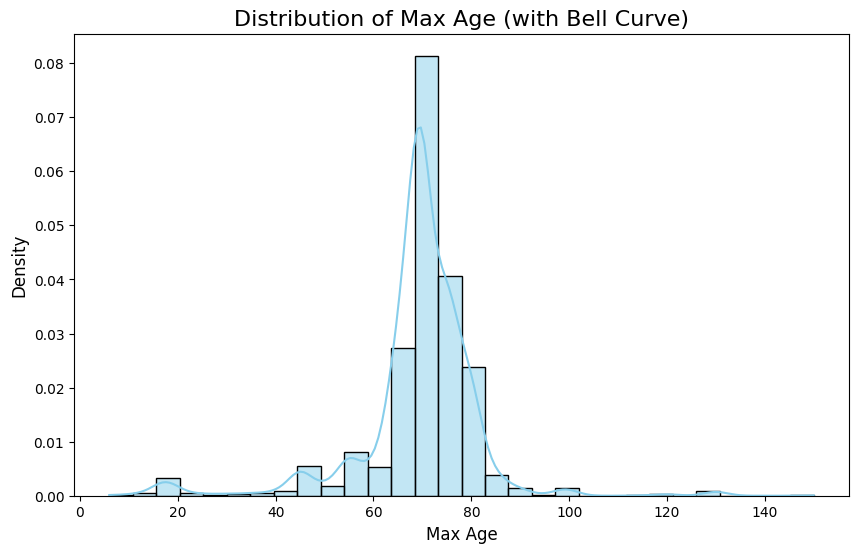

In [ ]:
# Plotting the histogram and KDE for 'max_age'
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
sns.histplot(df_copy['max_age'], kde=True, bins=30, color='skyblue', stat="density")

# Add titles and labels
plt.title('Distribution of Max Age (with Bell Curve)', fontsize=16)
plt.xlabel('Max Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Initialize KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the 'max_age' column directly in the original dataframe
df_combined['max_age'] = imputer.fit_transform(df_combined[['max_age']])

# Check if the missing values are imputed in the original dataframe
print(df_combined['max_age'].isnull().sum())

0


In [ ]:
# Convert the Datatype of 'max_age' to int
df_combined['max_age'] = df_combined['max_age'].astype(int)

**Note:**  
We used custom logic to **One-Hot Encode** the `gender` column into two separate columns, `male` and `female`. If the `gender` value is "ALL", both `male` and `female` are set to `1`. If the gender is "MALE", only `male` is set to `1`, and for "FEMALE", only `female` is set to `1`. The original `gender` column is dropped to ensure that only the encoded columns remain.

In [ ]:
df_combined['gender'].value_counts()

,count
gender,
ALL,3005
MALE,147
FEMALE,48


In [ ]:
df_combined['gender'].isna().sum()

0

In [ ]:
# Create 'male' and 'female' columns based on the 'gender' column
df_combined['male'] = df_combined['gender'].apply(lambda x: 1 if x == 'MALE' or x == 'ALL' else 0)
df_combined['female'] = df_combined['gender'].apply(lambda x: 1 if x == 'FEMALE' or x == 'ALL' else 0)

# Drop the original 'gender' column
df_combined.drop(columns=['gender'], inplace=True)

# Check the result
print(df_combined[['male', 'female']].head())

   male  female
0     1       1
1     1       1
2     1       1
3     1       1
4     1       1


In [ ]:
df_combined['total_dropout_rate']

,total_dropout_rate
0,0.05
1,0.00
2,0.00
3,0.00
4,0.02
...,...
3195,-1.00
3196,-1.00
3197,-1.00
3198,-1.00



**Note:**  
We converted the `total_dropout_rate` column from a float (representing percentages like 0.05) to an integer by multiplying by 100. This ensures that the percentage values are represented as whole numbers (e.g., 5 for 0.05). Missing values, represented by `-1`, were retained as `-1` to preserve the data's integrity.

In [ ]:
# Convert 'total_dropout_rate' from float to int (percentage representation)
df_combined['total_dropout_rate'] = df_combined['total_dropout_rate'].apply(
    lambda x: int(x * 100) if x != -1 else -1
)

# Check the result
print(df_combined['total_dropout_rate'].head())

0    5
1    0
2    0
3    0
4    2
Name: total_dropout_rate, dtype: int64


In [ ]:
df_combined['total_dropout_rate']

,total_dropout_rate
0,5
1,0
2,0
3,0
4,2
...,...
3195,-1
3196,-1
3197,-1
3198,-1


In [ ]:
df_combined[['start_date', 'end_date']]

,start_date,end_date
0,2013-05-27,2019-05-15
1,2016-08-04,2024-02-12
2,2009-11-11,2012-11-22
3,2013-10-24,2018-08-13
4,2013-08-29,2016-11-17
...,...,...
3195,2010-12-10,2013-04-19
3196,2019-06-24,2019-06-28
3197,2015-01-13,2020-03-18
3198,2011-08-26,2024-01-04



**Note:**  
We calculated the **trial length** by subtracting the `start_date` from the `end_date`, resulting in the number of days for each trial. The `start_date` and `end_date` columns were then dropped since the required information is now contained in the new `trail_length` column.

In [ ]:
# Convert 'start_date' and 'end_date' columns to datetime
df_combined['start_date'] = pd.to_datetime(df_combined['start_date'])
df_combined['end_date'] = pd.to_datetime(df_combined['end_date'])

# Calculate the trail length in days
df_combined['trail_length'] = (df_combined['end_date'] - df_combined['start_date']).dt.days

# Drop the original 'start_date' and 'end_date' columns
df_combined.drop(columns=['start_date', 'end_date'], inplace=True)

# Check the result
print(df_combined[['trail_length']].head())

   trail_length
0          2179
1          2748
2          1107
3          1754
4          1176


In [ ]:
df_combined['trail_length']

,trail_length
0,2179
1,2748
2,1107
3,1754
4,1176
...,...
3195,861
3196,4
3197,1891
3198,4514


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   study_id                                 3200 non-null   object 
 1   no_of_locations                          3200 non-null   int64  
 2   no_of_conditions                         3200 non-null   int64  
 3   enrollment                               3200 non-null   int64  
 4   no_of_arms                               3200 non-null   int64  
 5   no_of_drug_interventions                 3200 non-null   int64  
 6   no_of_behavioral_interventions           3200 non-null   int64  
 7   no_of_procedural_interventions           3200 non-null   int64  
 8   no_of_biological_interventions           3200 non-null   int64  
 9   no_of_device_interventions               3200 non-null   int64  
 10  no_of_dietary_interventions              3200 no

In [ ]:
df_combined['no_of_primary_outcomes'].isna().sum()

6

In [ ]:
# Median of 'no_of_primary_outcomes'
median_value = df_combined['no_of_primary_outcomes'].median()

# Fill the missing values
df_combined['no_of_primary_outcomes'] = df_combined['no_of_primary_outcomes'].fillna(median_value)


**Note**

So, I noticed that there were some missing values in the `no_of_secondary_outcomes` column (like, 258 missing values to be exact). To handle that, I decided to fill these missing spots using the **median** of the column.

**Why the median?**  
The reason for using the median here is pretty straightforward: the data is heavily skewed (lots of values clustered around 0 with a long tail). The median is a good fit in such cases because it's less sensitive to outliers compared to the mean. This way, we avoid distorting the data by filling with some unusually high or low number.

**What happened after filling with the median?**  
I plotted the distribution of the column before and after the imputation, and guess what? The overall shape of the data (the spread, peaks, and even the tail) remained pretty much the same! That’s because filling with the median doesn’t really introduce any new values, just adds more of what's already common (around the center of the data).

So, in simple terms:
- We filled missing values using the median to keep things stable.
- This ensured that the distribution didn’t change or become biased.
- It's a good way to handle missing data when you're working with skewed distributions like this one.

Hope this helps whoever’s looking at this code next!

In [ ]:
df_combined['no_of_secondary_outcomes'].isna().sum()

258

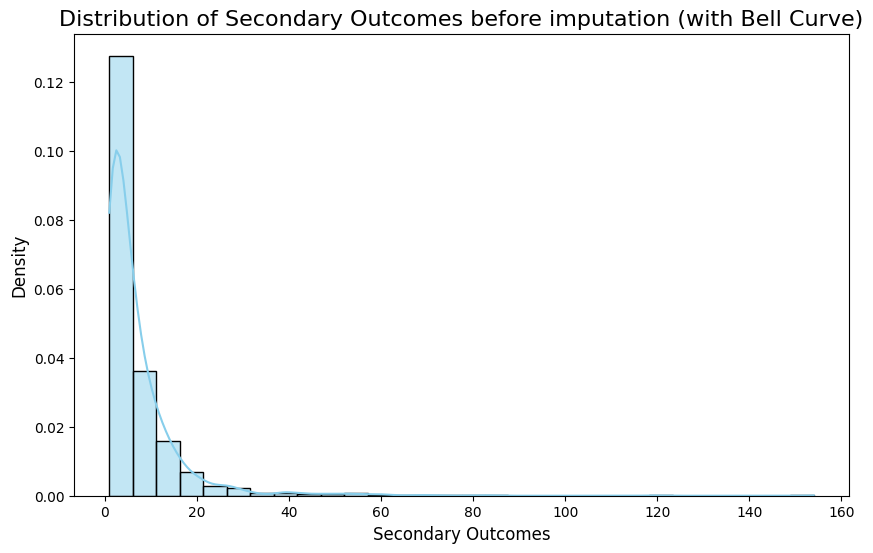

In [ ]:
# Plotting the histogram and KDE for 'no_of_secondary_outcomes'
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
sns.histplot(df_combined['no_of_secondary_outcomes'], kde=True, bins=30, color='skyblue', stat="density")

# Add titles and labels
plt.title('Distribution of Secondary Outcomes before imputation (with Bell Curve)', fontsize=16)
plt.xlabel('Secondary Outcomes', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Fill Missing values with median
median_value = df_combined['no_of_secondary_outcomes'].median()
df_combined['no_of_secondary_outcomes'] = df_combined['no_of_secondary_outcomes'].fillna(median_value)

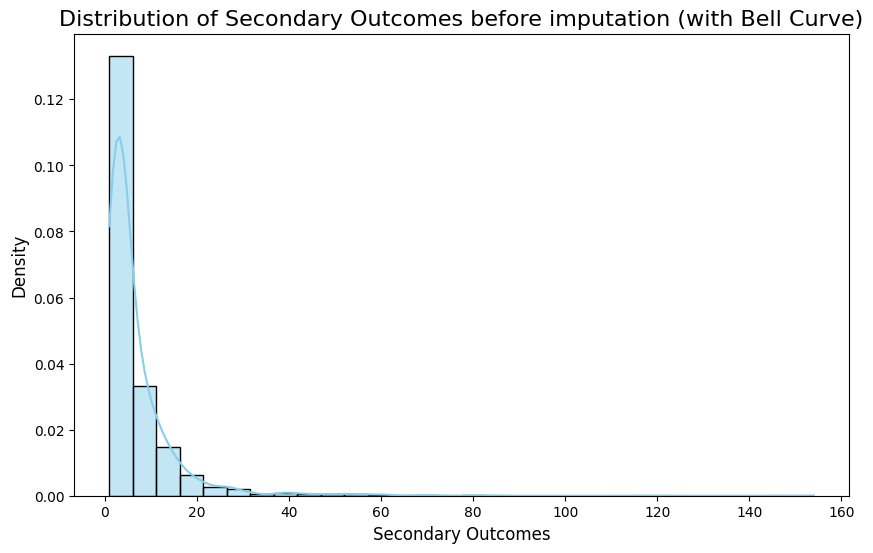

In [ ]:
# Plotting the histogram and KDE for 'no_of_secondary_outcomes'
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
sns.histplot(df_combined['no_of_secondary_outcomes'], kde=True, bins=30, color='skyblue', stat="density")

# Add titles and labels
plt.title('Distribution of Secondary Outcomes before imputation (with Bell Curve)', fontsize=16)
plt.xlabel('Secondary Outcomes', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [ ]:
df_combined['no_of_primary_outcomes'] = df_combined['no_of_primary_outcomes'].astype(int)
df_combined['no_of_secondary_outcomes'] = df_combined['no_of_secondary_outcomes'].astype(int)

In [ ]:
df_combined['has_result'].value_counts()

,count
has_result,
True,1600
False,1600


In [ ]:
# Map True to 1 and False to 0
df_combined['has_result'] = df_combined['has_result'].map({True: 1, False: 0})

# Check the result
print(df_combined['has_result'].value_counts())

has_result
1    1600
0    1600
Name: count, dtype: int64


In [ ]:
df_combined['has_result'].value_counts()

,count
has_result,
1,1600
0,1600


## Data Visualization

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   study_id                                 3200 non-null   object
 1   no_of_locations                          3200 non-null   int64 
 2   no_of_conditions                         3200 non-null   int64 
 3   enrollment                               3200 non-null   int64 
 4   no_of_arms                               3200 non-null   int64 
 5   no_of_drug_interventions                 3200 non-null   int64 
 6   no_of_behavioral_interventions           3200 non-null   int64 
 7   no_of_procedural_interventions           3200 non-null   int64 
 8   no_of_biological_interventions           3200 non-null   int64 
 9   no_of_device_interventions               3200 non-null   int64 
 10  no_of_dietary_interventions              3200 non-null   int

In [ ]:
df_combined.drop(columns=['study_id'], inplace=True)

In [ ]:
df_combined.head().T

,0,1,2,3,4
no_of_locations,17,11,76,9,1
no_of_conditions,1,2,1,1,1
enrollment,190,109,530,114,45
no_of_arms,2,2,7,3,2
no_of_drug_interventions,2,0,3,3,2
no_of_behavioral_interventions,0,0,0,0,0
no_of_procedural_interventions,0,2,0,0,0
no_of_biological_interventions,0,0,0,0,0
no_of_device_interventions,0,0,0,0,0
no_of_dietary_interventions,0,0,0,0,0


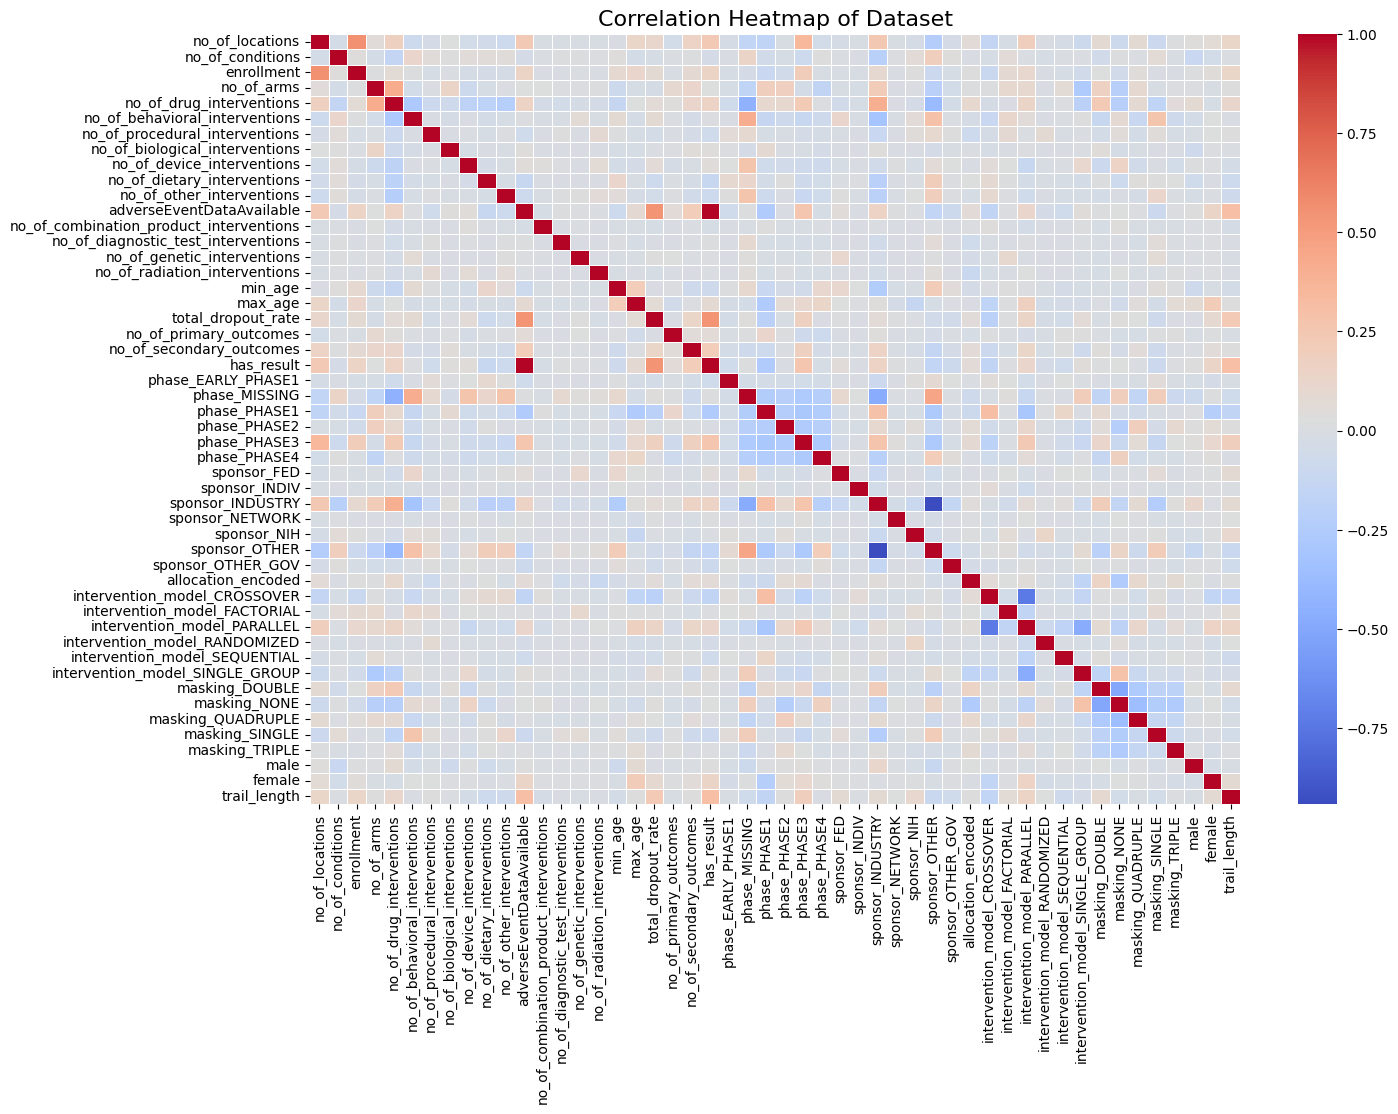

In [ ]:
# Generate a correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df_combined.corr()

# Create the heatmap
sns.heatmap(correlation_matrix,
            annot=False,  # Set to True if you want to display correlation values
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Dataset", fontsize=16)

# Display the heatmap
plt.show()


<ipython-input-96-51c727655b31>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_result', y=feature, data=df_combined, palette='Set2')


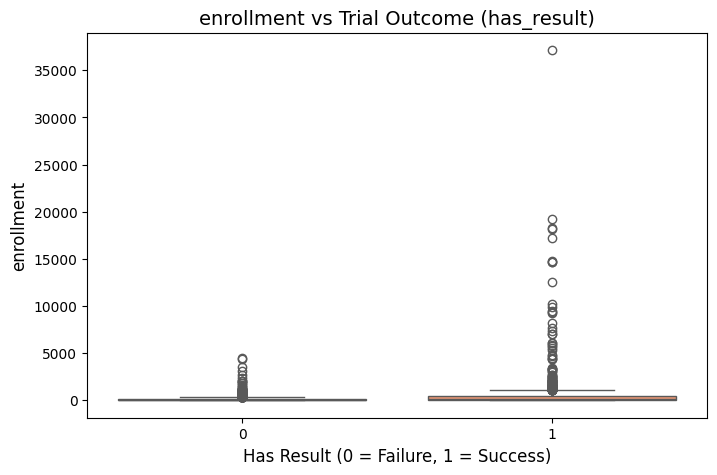

<ipython-input-96-51c727655b31>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_result', y=feature, data=df_combined, palette='Set2')


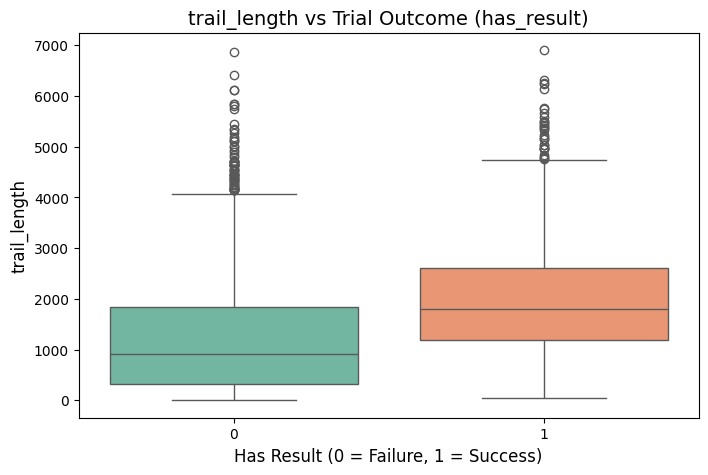

<ipython-input-96-51c727655b31>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_result', y=feature, data=df_combined, palette='Set2')


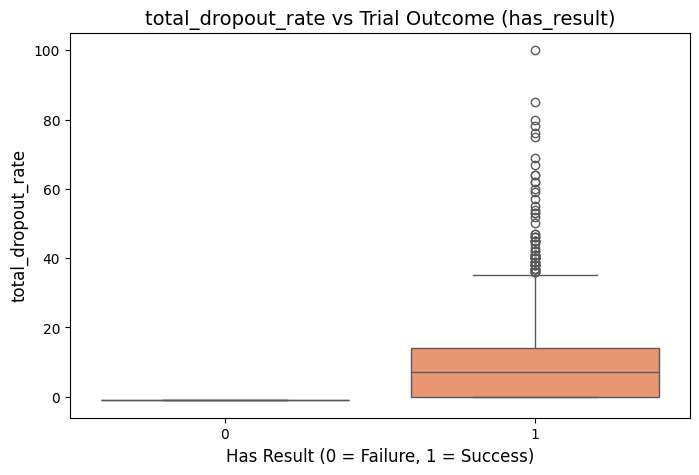

In [ ]:
# List of continuous features to analyze
continuous_features = ['enrollment', 'trail_length', 'total_dropout_rate']

# Create boxplots for each feature
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='has_result', y=feature, data=df_combined, palette='Set2')
    plt.title(f"{feature} vs Trial Outcome (has_result)", fontsize=14)
    plt.xlabel("Has Result (0 = Failure, 1 = Success)", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()


In [ ]:
from scipy.stats import chi2_contingency
# List of categorical features to analyze
categorical_features = ['phase_PHASE1', 'phase_PHASE2', 'phase_PHASE3', 'sponsor_FED',
                        'sponsor_INDUSTRY', 'masking_DOUBLE', 'masking_NONE']
# Function to perform chi-square test
def chi_square_test(feature):
    contingency_table = pd.crosstab(df_combined[feature], df_combined['has_result'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    print('-' * 40)

# Run chi-square test for each categorical feature
for feature in categorical_features:
    chi_square_test(feature)

Chi-Square Test for phase_PHASE1:
Chi2 = 208.31, p-value = 0.0000
----------------------------------------
Chi-Square Test for phase_PHASE2:
Chi2 = 0.01, p-value = 0.9256
----------------------------------------
Chi-Square Test for phase_PHASE3:
Chi2 = 213.49, p-value = 0.0000
----------------------------------------
Chi-Square Test for sponsor_FED:
Chi2 = 8.72, p-value = 0.0031
----------------------------------------
Chi-Square Test for sponsor_INDUSTRY:
Chi2 = 75.48, p-value = 0.0000
----------------------------------------
Chi-Square Test for masking_DOUBLE:
Chi2 = 0.84, p-value = 0.3594
----------------------------------------
Chi-Square Test for masking_NONE:
Chi2 = 2.06, p-value = 0.1508
----------------------------------------


1. **Significant Features:** `phase_PHASE1`, `phase_PHASE3`, `sponsor_FED`, and `sponsor_INDUSTRY` show strong associations (p < 0.05) with trial outcomes and can be valuable for predictive modeling.  
2. **Non-Significant Features:** Features like `phase_PHASE2` and `masking_*` have weak/no association (p > 0.05) and may not add value to the model.  

In [ ]:
df_combined.to_csv('dataset_v2.csv', index=False)